In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.3 MB/s eta 0:00:00


In [2]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.394s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [3]:
# list them
!ls -l

total 6288
-rw-r--r-- 1 root root  166383 Aug  8 11:35 chemifloor.jpg
-rw-r--r-- 1 root root   59898 Jul  4 12:44 chinese.jpg
-rw-r--r-- 1 root root   44023 Aug  8 11:35 colortec.jpg
-rw-r--r-- 1 root root  218606 Aug  8 11:35 designcement.jpg
-rw-r--r-- 1 root root   97910 Jul  4 12:44 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Jul  4 12:44 english.png
-rw-r--r-- 1 root root  487995 Jul  4 12:44 example2.png
-rw-r--r-- 1 root root  127454 Jul  4 12:44 example3.png
-rw-r--r-- 1 root root  488641 Jul  4 12:44 example.png
-rw-r--r-- 1 root root  168376 Jul  4 12:44 french.jpg
-rw-r--r-- 1 root root   61409 Aug  8 11:35 gotitcovered.jpg
-rw-r--r-- 1 root root  332301 Aug  8 11:35 imagenprueba10.jpg
-rw-r--r-- 1 root root  169290 Aug  8 11:35 imagenprueba11.jpg
-rw-r--r-- 1 root root  531715 Aug  8 11:35 imagenprueba12.jpg
-rw-r--r-- 1 root root  257160 Aug  8 11:35 imagenprueba13.jpg
-rw-r--r-- 1 root root   26128 Aug  8 11:34 imagenprueba14.jpg
-rw-r--r-- 1 root root   41236 A

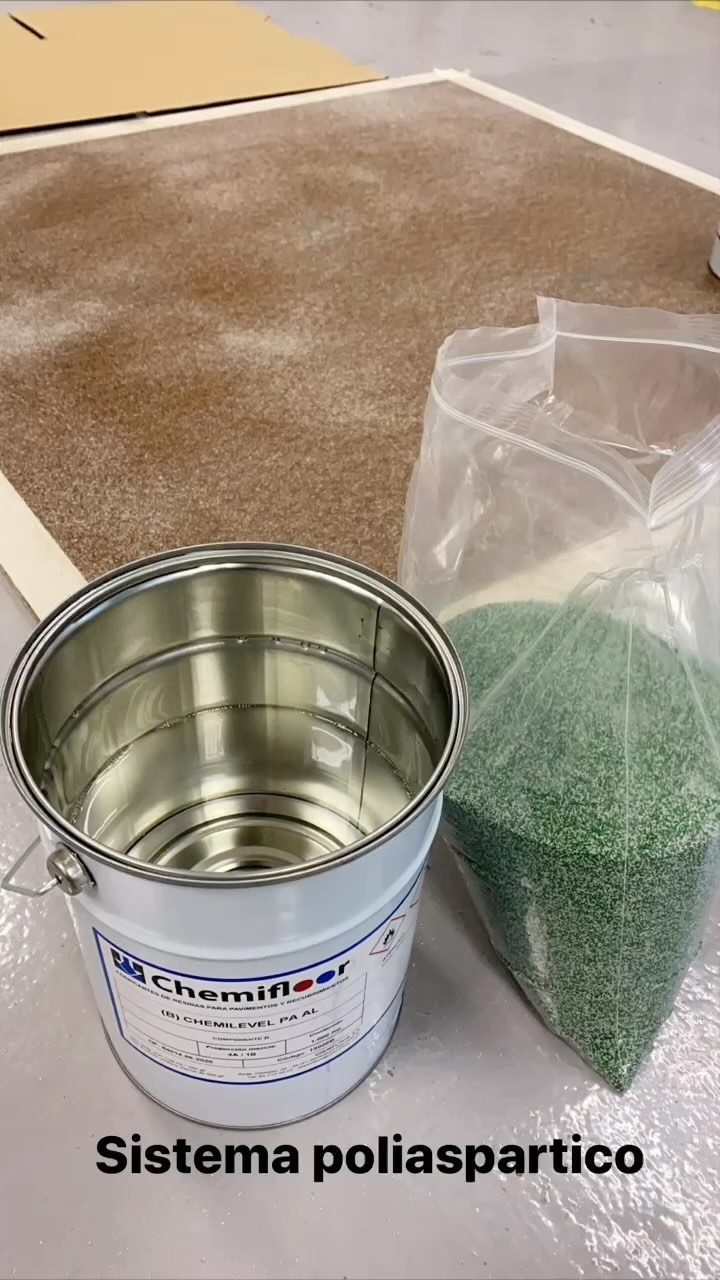

In [4]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("chemifloor.jpg")
im

In [5]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('chemifloor.jpg')
bounds

[([[238, 1020], [272, 1020], [272, 1028], [238, 1028]],
  '.',
  0.16921626137694634),
 ([[88, 1125], [653, 1125], [653, 1193], [88, 1193]],
  'sistema poliaspartico',
  0.7840437641692568),
 ([[115.25097310286003, 946.0564224788761],
   [298.9952807917753, 979.7828138786184],
   [288.74902689713997, 1021.9435775211239],
   [105.0047192082247, 988.2171861213816]],
  'aehemu',
  0.17466306971870588),
 ([[161.39028923915032, 1007.2073760108954],
   [181.98233856642247, 1011.81288789211],
   [179.60971076084968, 1021.7926239891046],
   [159.01766143357753, 1016.18711210789]],
  '+าง',
  0.01819305308163166),
 ([[183.4929798734366, 1013.1380657848422],
   [236.99982857632514, 1021.981484655994],
   [235.5070201265634, 1031.8619342151578],
   [181.00017142367486, 1023.018515344006]],
  'อรเาา',
  0.0024655140491742084)]

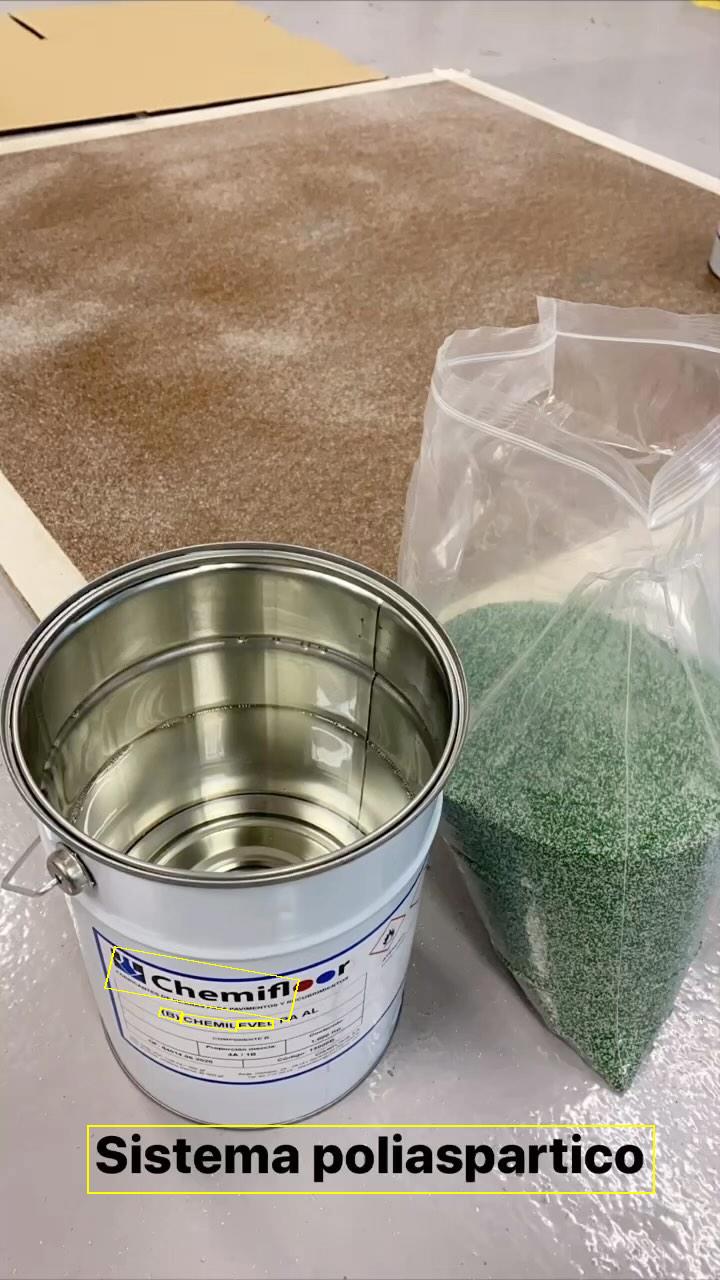

In [7]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)